In [3]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import os
os.system("source activate root")
%matplotlib notebook
shape=cv2.imread("hibiscus.jpg")
im(shape)

In [2]:
def im(image,name="image"):
    cv2.imshow(name,image)
    cv2.waitKey(0)
    cv2.destroyAllWindows()

In [3]:
hsv=cv2.cvtColor(shape,cv2.COLOR_BGR2HSV)
plt.imshow(hsv)

In [4]:
black=np.zeros((1000,1000,3),np.uint8)
cv2.rectangle(black,(100,900),(700,500),(255,0,0),-1)
cv2.rectangle(black,(60,60),(500,500),(100,100,0),-1)
plt.imshow(black)

In [5]:
#black=res
import cv2
import matplotlib.pyplot as plt
import numpy as np
import os
lines=[]
def center_of_contour(x_c):
    M=cv2.moments(x_c)
    return (int(M['m10']/M['m00']+1),int(M['m01']/M['m00']+1))
def x_cord_contour(x_c):
    if cv2.contourArea(x_c) >9:
        return center_of_contour(x_c)[0]
    
def image_color_track(black):
    gray=cv2.cvtColor(black,cv2.COLOR_RGB2GRAY)
    can=cv2.Canny(gray,3,20)
    con_img,contours,hierarchy=cv2.findContours(can,cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_SIMPLE)
    cv2.drawContours(black,contours,-1,(0,255,0),5)
    lines.append(center_of_contour(contours[0]))
    if len(lines)>0:
        for i in range(len(lines)-1):
            cv2.line(black,lines[i],lines[i+1],(255,255,255),3)
    return black

<IPython.core.display.Javascript object>


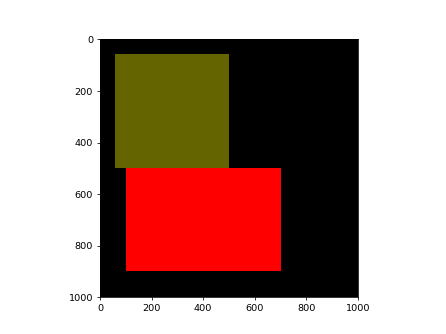

In [20]:
plt.imshow(black)

In [22]:
#black=res
import cv2
import matplotlib.pyplot as plt
import numpy as np
import os
lines=[]
def center_of_contour(x_c):
    M=cv2.moments(x_c)
    #print(M['m00'])
    return (int(M['m10']/(M['m00'])),int(M['m01']/(M['m00'])))
def x_cord_contour(x_c):
    if cv2.contourArea(x_c) >9:
        return center_of_contour(x_c)[0]
    
def image_color_track(black,image):
    gray=cv2.cvtColor(black,cv2.COLOR_RGB2GRAY)
    can=cv2.Canny(gray,3,20)
    con_img,contours,hierarchy=cv2.findContours(can,cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_SIMPLE)
   
    try:
        sorted_cont=sorted(contours,key=cv2.contourArea,reverse=True)
        cv2.drawContours(black,sorted_cont[0],-1,(0,255,0),5)
        try:
            lines.append((center_of_contour(sorted_cont[0])+lines[-1])/2)
        except:
            lines.append((center_of_contour(sorted_cont[0])))
    finally:
        if len(lines)>50:
            lines.pop(0)
        if len(lines)>0:
            for i in range(len(lines)-1):
                cv2.line(image,lines[i],lines[i+1],(255,255,255),3)
        return black
def color_extractor(image): 
    #hsv=cv2.cvtColor(image,cv2.COLOR_BGR2HSV)
    hsv=image
    lower_lim=np.array([0,0,0],dtype='uint8')
    upper_lim=np.array([10,1,255],dtype='uint8')
    mask=cv2.inRange(hsv,lower_lim,upper_lim)
    res=cv2.bitwise_and(hsv,hsv,mask=mask)
    kernel=np.ones((5,5),np.uint8)
    res=cv2.dilate(res,kernel,iterations=1)
    res=cv2.blur(res,(8,8))
    #return res
    return image_color_track(res,image)

[255 255 255]


<IPython.core.display.Javascript object>


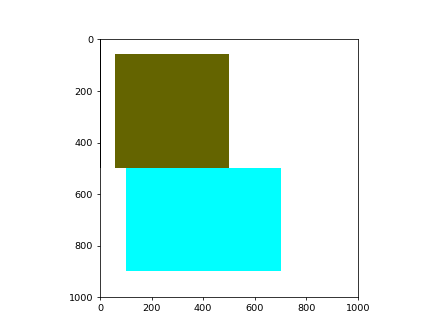

(1000, 1000, 3)


In [68]:
black[100][100]=(0,0,0)
print(black[100][10])
plt.imshow(black)
print(black.shape)

<IPython.core.display.Javascript object>


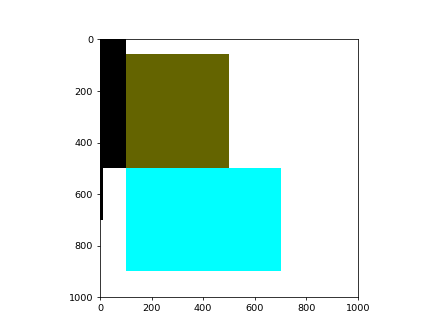

In [71]:
## TESTING
for j in range(10):
    for i in range(700):
        black[i][j]=(0,0,0)
#         if black[i][j][2]<=0:
#             p=0
#         else:
#             black[i][j]=(0,0,0)
plt.imshow(black)

In [23]:
cap = cv2.VideoCapture('http://172.16.18.113:4747/video')
# VideoCapture cap
# cap.open(192.168.1.180/?action=stream?dummy=param.mjpg)
# fourcc = cv2.VideoWriter_fourcc(*'XVID')
# out = cv2.VideoWriter('output.avi',fourcc, 20.0, (640,480))




if (cap.isOpened()== False): 
  print("Error opening video stream or file")
 
# Read until video is completed
while(cap.isOpened()):
  # Capture frame-by-frame
  ret, frame = cap.read()
  if ret == True:
 
    # Display the resulting frame
    cv2.imshow('Frame',color_extractor(frame))
 
    # Press Q on keyboard to  exit
    if cv2.waitKey(25) & 0xFF == ord('q'):
      break
 
  # Break the loop
  else: 
    break
 
# When everything done, release the video capture object
cap.release()
 
# Closes all the frames
cv2.destroyAllWindows()

In [ ]:
import cv2
cap=cv2.VideoCapture(0)
while True:
    ret,frame=cap.read()
    frame=cv2.flip(frame,1)
    #frame=cv2.convertScaleAbs(frame)
    cv2.imshow("skecth",color_extractor(frame))
    if cv2.waitKey(1) & 0xFF ==ord('q') :
        break
cap.release()
cv2.destroyAllWindows()

In [12]:
plt.imshow(color_extractor(frame))
frame.dtype

IndexError: list index out of range

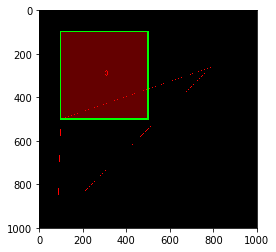

In [41]:
sorted_x_contour=sorted(contours,key=x_cord_contour)
line=((100,500),(85,952),(789,262))
pts=np.array(line,np.int32)
pts=pts.reshape((-1,1,2))
cv2.polylines(black,[pts],True , (255))
for (i,j) in enumerate(sorted_x_contour):
    cv2.putText(black,str(i),center_of_contour(j),cv2.FONT_HERSHEY_DUPLEX,1,(255,0,0),2)
plt.imshow(black)